### TP_Examen_Deep_Learning

######  1- Entrenar el modelo propuesto a continuación de este enunciado. El modelo está haciendo underfitting, overfitting o un fit correcto. ¿Por qué? Explicar el procedimiento realizado.
###### $$\hat{y} = x^{3}W_{1}+x^{2}W_{2}+xW_{1}+b$$

#### Importamos bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Definimos funciones

In [2]:
def init_parameters():
    W2 = np.random.randn(1)
    W1 = np.random.randn(1)
    b = np.zeros((1))


    parameters = {"W1": W1,
                  "W2": W2,
                  "b": b}
    return parameters

In [3]:
def forward_propagation(X, parameters):
    # paramters
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b = parameters["b"]
    # function first neuron
    W = np.array([[W1,W2,W1]]).reshape(1,3)
    X = np.reshape(X,(1,3))
    Z = np.dot(W, X.T) + b

    return Z

In [4]:
def compute_cost(Z, Y):
    Y = np.reshape(Y,(1,1))

    cost =(Y - Z)

    return cost

In [5]:
def backward_propagation(parameters, Z, X, Y):


    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b = parameters["b"]

    X = np.reshape(X,(3,1))
    Y = np.reshape(Y,(1,1))
    dZ = -2*(Y-Z)

    dW1 = dZ*(X[0,:]+X[2,:])
    dW2 = dZ*(X[1,:])
    db = dZ


    grads = {"dW1": dW1,
             "dW2": dW2,
             "db": db}

    return grads

In [6]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b= parameters["b"]

    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db = grads["db"]



    W1 = W1 - learning_rate * dW1
    W2 = W2 - learning_rate * dW2
    b = b - learning_rate * db


    parameters = {"W1": W1,
                  "W2": W2,
                  "b": b}
    return parameters

In [7]:
# NN_model
def nn_model(X, Y, valid_x, valid_y, learning_rate, num_iterations):
    # Initialize parameters
    losses = np.zeros((num_iterations, 1))
    losses_test = np.zeros((num_iterations, 1))
    parameters = init_parameters()
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b = parameters["b"]

    salida=[]
    salida_test=[]
    # Loop (SGD)
    for i in range(0, num_iterations):
        ################################
        ###########Training#############
        for j in range (8000):
        # Forward propagation
            Z = forward_propagation(X[j,:], parameters)
        # Error
            error = compute_cost(Z, Y[j])
        # Backpropagation.
            grads = backward_propagation(parameters,Z, X[j,:], Y[j])
        # Update each parameter
            parameters = update_parameters(parameters, grads, learning_rate)

            cost =  np.sum(np.power(error,2))
            salida.append(Z)
        MSE = cost/8000
        #plt.plot(i,MSE,'bo')
        losses[i, 0]= MSE

        ################################
        ###########Validating#############
        for j in range (2000):
        # Forward propagation
            Z = forward_propagation(valid_x[j,:], parameters)
        # Error
            error = compute_cost(Z, valid_y[j])
        # Backpropagation.
            #grads = backward_propagation(parameters,Z, valid_x[j,:], valid_y[j])
        # Update each parameter
            #parameters = update_parameters(parameters, grads, learning_rate)

            cost =  np.sum(np.power(error,2))
            salida_test.append(Z)
        MSE_test = cost/2000
        #plt.plot(i,MSE_test,'bo')
        losses_test[i, 0]= MSE_test

    return parameters, salida, losses, losses_test

#### Carga del dataset y separación de los datos de entrenamiento

In [8]:
import pandas as pd
data_1 = pd.read_csv('./data/dataset_1.csv')

y_root = np.array(data_1.iloc[:,1]).reshape(10000,1)
x_root =  data_1.iloc[:, 0]

x3 = np.array(x_root**3).reshape(10000,1)
x2 = np.array(x_root**2).reshape(10000,1)
x1 = np.array(x_root).reshape(10000,1)
df = np.concatenate((x3,x2,x1,y_root),axis=1)

p_train = 0.80 # Porcentaje de train.
train = (df[:int(len(df)*p_train),:])
valid = (df[int(len(df)*p_train):,:])
print(valid.shape)
train_X, train_y = np.array(train[:, :-1]).reshape(8000,3), np.array(train[:, -1]).reshape(8000,1)
valid_X, valid_y = np.array(valid[:, :-1]).reshape(2000,3), np.array(valid[:, -1]).reshape(2000,1)
print(train_X.shape, train_y.shape)
#matriz_X = x_root
#matriz_Y = y

(2000, 4)
(8000, 3) (8000, 1)


#### Gráfico de los datos de entrenamiento

##### Grafico original de datos Y vs x

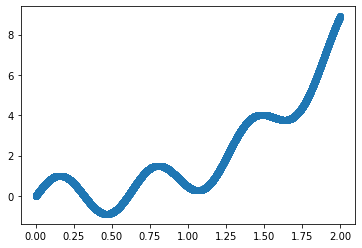

In [9]:
# Original X vs Y
plt.scatter(x_root,y_root)
plt.show()

In [11]:
# Training polynom
parameters, salida, losses, losses_valid = nn_model(train_X, train_y, valid_X, valid_y, 0.00001 , num_iterations = 1000)

##### Grafico  train vs valid en funcion de las epochs

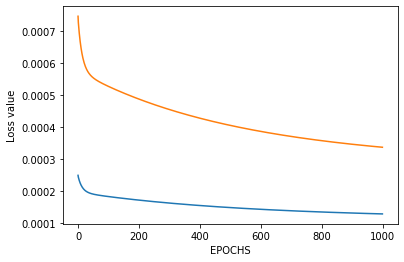

In [12]:
# Evaluating the performance
plt.figure()
plt.plot(losses)
plt.plot(losses_valid)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

In [13]:
SALIDA = salida[-8000:]
x_salida = train_X[-8000:,2]


#### Gráfico de la salida del modelo sin función de activación

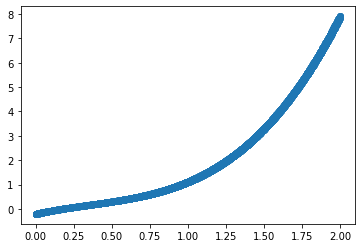

In [14]:
plt.scatter(x_salida,SALIDA)
plt.show()

#### Conclusión:
###### Se desarrolló un modelo según la función polinomica de 3er grado con una función de "loss" SGD para actualizar los pesos W1 y W2. IMPORTANTE, es necesario en este ejemplo tener un learning rate < 0.01 ya que pasé una semana creyendo que el modelo estaba mal y nunca lograba la convergencia.
###### Según el error de entrenamiento es cercano a cero y en pocas iteraciones. La diferencia del error entre training y validating es poca, pero lo más importante es que a medida que aumentan las epochs el error de validating no aumenta sino que se trata de aproximar al error de entrenamiento. Esto significa que el modelo está haciendo un correcto fitting. Además de comparar el gráfico original (f(x)=y) y sin hacer validación puedo inferir que el modelo aproxima realmente al gráfico original. Esto significa que el modelo es correcto en aproximar su salida según la función cúbica, solo fue necesario encontrar los pesos W1 y W2 correctos.